In [2]:
#Comparing Machine Learning Algorithms

In [ ]:
#In this we will compare 6 Machine Learning algorithms simultaneosly

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.701760 (0.061666)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


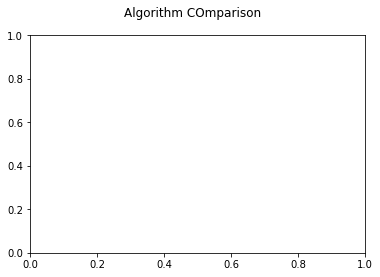

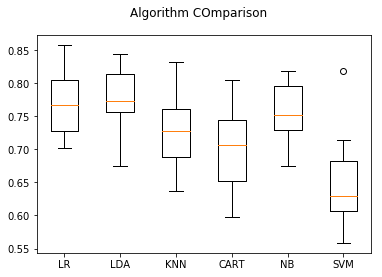

In [38]:
#Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] # col names
dataframe = read_csv(filename, names = names)
array = dataframe.values

X = array[:, 0:8]
Y = array[:, 8]

#now we prepare the moodAls
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#make a loop for evaluating each model

names = []
result = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 7)
    cv_results = cross_val_score(model, X, Y, cv = kfold, scoring = scoring)
    result.append(cv_results)
    names.append(name)
    ans = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(ans)

#visualization for comparison using boxplot
fig = pyplot.figure()
fig.suptitle('Algorithm COmparison')
ax = fig.add_subplot(111)
pyplot.boxplot(result)
ax.set_xticklabels(names)
pyplot.show()